In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# reading the data from the disk and display the head of dataframe
df = pd.read_csv('Train_data.csv')
df.head()

,Label,Text
0,CLOS_DISC,Closing DisclosureThis form is a statement of ...
1,CLOS_DISC,Closing Cost DetailsBorrower-PaidSeller-PaldLo...
2,CLOS_DISC,Calculating Cash to CloseUse this table to see...
3,CLOS_DISC,Additiona Information About This LoanLoan Disc...
4,CLOS_DISC,Loan CalculationsOther DisclosuresTotal of Pay...


In [13]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16130 entries, 0 to 16129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   16130 non-null  object
 1   Text    16130 non-null  object
dtypes: object(2)
memory usage: 252.2+ KB


* There are not missing values and total 16130 records

In [16]:
print('Total unique labels are {}'.format(df.Label.nunique()))
df.Label.unique()

Total unique labels are 56


array(['CLOS_DISC', 'NOTE', 'MORTGAGE', 'WARRANTY_DEED', 'WIRING_INST',
       'CHAIN_TITLE', 'TITLE', 'Notice of Ad Valorem Tax', 'CPL',
       'Survey', 'Policy Endorsement', 'ESCROW', 'QM_BREAKDOWN',
       'HOMEOWNERSHIP_COUNSELING_ORG_LIST',
       'ACK_HOMEOWNERSHIP_COUNSELING_ORG_LIST', 'FORM1003', 'APPROVAL',
       'LOCK_CONFORMATION', 'AUS-DU', 'CREDIT_REPORT', 'VERBAL_VOE',
       'APPRAISAL', 'LOAN_EST', 'STEERING', 'APPRAISAL_REPORT_INVOICE',
       'Survey Invoice', 'Third Party Processing Invoice', 'HOI Invoice',
       'CREDIT_INQUIRY', 'PATRIOT', 'FORM4506-T',
       'BUSSINESS_ARRANGEMENT_DISC_STATEMENT', 'FLOOD_INSURANCE', 'FLOOD',
       'CONSENT_AND_INTENT_TO_PROCEED',
       'APPRAISAL_DELIVERY_WAIVER/CONSENT_AND_INTENT_TO_PROCEED',
       'Credit Inquiry', 'EQUAL_CREDIT_OPPURTUNITY_ACT', 'Chain of Title',
       'Loan Approval', 'PURCHASE_CONTRACT', 'PURCHASE_CONTRACT_ADDENDUM',
       'COC', 'HOI', 'PURCHASE_CONTRACT_EXTENSION_ADDENDUM',
       'APPRAISAL_DELIVE

* There are 56 unique classes. Machine leanring algorithm understand only numerical values so Now we need to represent each classes as number 

In [23]:
# Creating a new column in dataframe for label id
df['label_id'] = df.Label.factorize()[0]
df.head()

,Label,Text,label_id
0,CLOS_DISC,Closing DisclosureThis form is a statement of ...,0
1,CLOS_DISC,Closing Cost DetailsBorrower-PaidSeller-PaldLo...,0
2,CLOS_DISC,Calculating Cash to CloseUse this table to see...,0
3,CLOS_DISC,Additiona Information About This LoanLoan Disc...,0
4,CLOS_DISC,Loan CalculationsOther DisclosuresTotal of Pay...,0


In [31]:
#category_id_df = df2[['Product', 'category_id']].drop_duplicates()
label_id_df = df[['Label', 'label_id']].drop_duplicates()

#Dictionaries for future use
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['lalbel_id','Label']].values)

* In below bar chart showing the number of records per label

In [1]:
def plot():
    fig = plt.figure(figsize=(10,10))
    df.groupby('Label').Text.count().sort_values().plot.barh(ylim =0, title= 'Number of records per label\n')
    plt.xlabel('Number of records.')
    

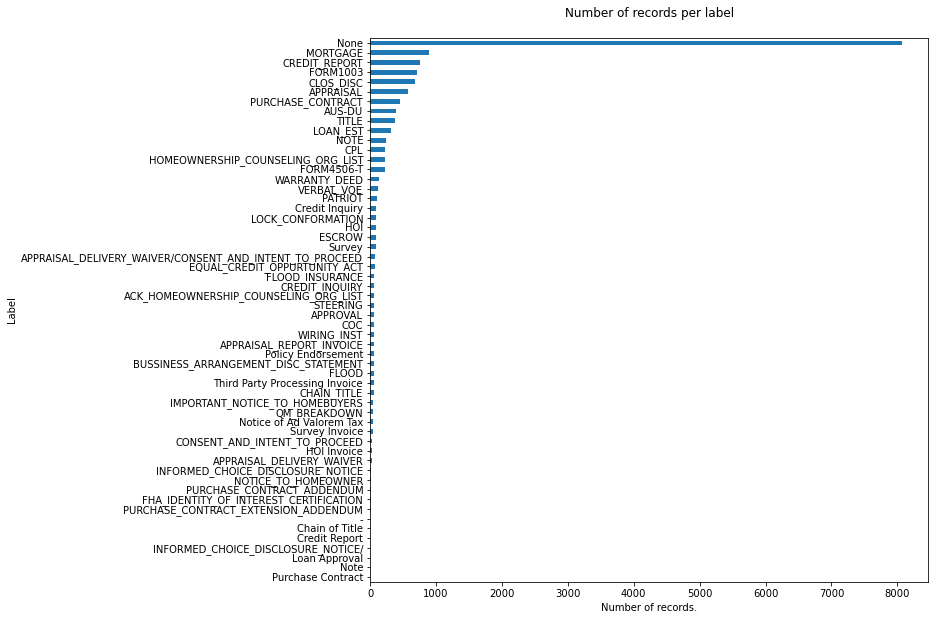

In [42]:
plot()

### Text-Preprocessing

In [ ]:
# create a object of term-frequency, inverse document frequency 
tfidf = TfidfVectorizer(min_df = 5, ngram_range=(1,2), stop_words = 'english', sublinear_tf = True)

# transform each lebel into vector
feature = tfidf.fit_transform(df.Text).toarray()